# Game Setup

In [1]:
# We are using retro to play 'Teenage Mutant Ninja Turtles - Tournament Fighters' using a ROM
''' stable-retro(retro) is a fork of of gym-retro ('lets you turn classic video games into Gymnasium environments 
    for reinforcement learning') with additional games, emulators and supported platforms.'''
import retro

## List of games supported in retro

In [2]:
retro.data.list_games()

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

## Installing a game rom

In [3]:
# You can import any game roms provided in above list using the below command
# !python3 -m retro.import /Rom/Folder/Path
# Since I have already imported through terminal,I am not enabling this cell

### I have installed 'Teenage Mutant Ninja Turtles - Tournament Fighters' for this project(My favorite retro game) 

# Let's create a sample game environment

In [4]:
env = retro.make(game='TeenageMutantNinjaTurtlesTournamentFighters-Nes', render_mode="human") # render_mode = "human" enables a pop-up window for game play view.

# Checking game properties

In [5]:
env.observation_space # defines the structure of the observations your environment(which is usually a Box(0, 255, [height, width, 3]) for RGB pixels).

Box(0, 255, (224, 240, 3), uint8)

In [6]:
env.action_space.sample() # samples random actions

array([0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int8)

In [7]:
len(env.action_space.sample()) # length of action space

9

# Rendering game

In [8]:
obs = env.reset()

# Set done flag to flase, done is marked based on two values terminated and truncated
# In older versions we obtained done directly but in current version we are getting into terminated, truncated separately
done = False
for game in range(1): 
    while not (done): 
        if (done): 
            obs = env.reset()
        env.render()
        obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        done = terminated or truncated # logic to flag done
        if reward > 0: # shows reward only if it is higher than zero
            print(reward) 

1000.0
1000.0
100.0
100.0
200.0
200.0
1000.0
1000.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
1000.0
100.0
100.0
100.0
1000.0
1000.0
200.0
200.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
100.0
1.0
200.0
200.0
1000.0
100.0


In [9]:
env.close() # closes the current running envirnoment

Note : We cannot run multiple envirnoments simultaniously

In [10]:
info # provides previous game available stats

{'enemy_health': 82,
 'enemy_rounds_won': 2,
 'health': 0,
 'rounds_won': 0,
 'score': 22501}

# Setting up Environment

In [11]:
# Import environment base class for a wrapper 
from gym import Env 
# Import the space shapes for the environment
from gym.spaces import MultiBinary, Box
# Import numpy to calculate frame delta 
import numpy as np
# Import opencv for grayscaling
import cv2
# Import matplotlib for image plotting
from matplotlib import pyplot as plt

### Testing Grayscaling code

In [12]:
gray = cv2.cvtColor(obs, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_CUBIC)
channel = np.reshape(resize, (84,84,1))

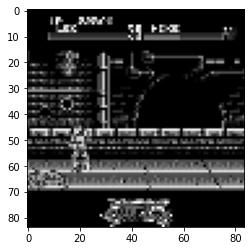

In [13]:
plt.imshow(cv2.cvtColor(channel, cv2.COLOR_BGR2RGB))

## Creating a Custom Envirnoment

In [14]:
# Create custom environment 
class Turtle(Env): 
    def __init__(self):
        super().__init__()
        # resizing the envirnoment
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(9)
        # startup and instance of the game 
        self.game = retro.make(game='TeenageMutantNinjaTurtlesTournamentFighters-Nes', use_restricted_actions=retro.Actions.FILTERED)
    
    def reset(self):
        # Returns the first frame of game
        obs = self.game.reset()[0]
        obs = self.preprocess(obs) 
        self.previous_frame = obs 
        
        # Create a attribute to hold the score delta 
        self.score = 0 
        return obs
    
    def preprocess(self, observation): 
        # Grayscaling 
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resizing for easy processing
        resize = cv2.resize(gray, (84,84), interpolation=cv2.INTER_CUBIC)
        # Add the channels value
        channels = np.reshape(resize, (84,84,1))
        return channels 
    
    def step(self, action): 
        obs, reward, terminated, truncated, info = self.game.step(action)
        done = terminated or truncated
        obs = self.preprocess(obs) 
        
        # Frame delta 
        frame_delta = obs - self.previous_frame
        self.previous_frame = obs 
        
        # tracking score
        reward = info['score'] - self.score 
        self.score = info['score'] 
        
        return frame_delta, reward, done, info
    
    def render(self, *args, **kwargs):
        self.game.render()
        
    def close(self):
        self.game.close()

In [15]:
env.close()

In [16]:
env = Turtle() # initializing game through custom envirnoment

In [17]:
# Resetting game state to start
obs = env.reset()
# Set done flag to flase
done = False
for game in range(1): 
    while not (done): 
        if done: 
            obs = env.reset()
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        if reward > 0: 
            print(reward)

200
1000
1000
100


In [18]:
info

{'enemy_health': 69,
 'enemy_rounds_won': 2,
 'health': 0,
 'rounds_won': 0,
 'score': 2300}

# Hyperparameter tuning

In [19]:
# Importing the optimzation frame - HPO
import optuna
# I am using stable-baselines3 version 1.4.0
# PPO algo for Reinforcement Learning
from stable_baselines3 import PPO
# Bring in the eval policy method for metric calculation
from stable_baselines3.common.evaluation import evaluate_policy
# Import the sb3 monitor for logging 
from stable_baselines3.common.monitor import Monitor
# Import the vec wrappers to vectorize and frame stack
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
# Import os to deal with filepaths
import os

In [20]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'

In [21]:
# Function to return test hyperparameters
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [22]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_model_number_{}'.format(1))

In [23]:
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = Turtle()
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda:env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=4)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_model_number_{}'.format(trial.number))
        model.save(SAVE_PATH)
        return mean_reward

    except Exception as e:
       return -1000

In [24]:
env.close()

In [25]:
# Creating the experiment 
study = optuna.create_study(direction='maximize')
study.optimize(optimize_agent, n_trials=1, n_jobs=1)

[I 2023-12-05 14:12:39,534] A new study created in memory with name: no-name-301f996c-899a-44d3-82b0-b906cbe8b9d7
/tmp/ipykernel_981/3118028740.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
/tmp/ipykernel_981/3118028740.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
/tmp/ipykernel_981/3118028740.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'clip_range':trial.suggest_uniform('clip_range',

In [26]:
# to fetch best parameters
study.best_params

{'n_steps': 3773,
 'gamma': 0.9032240757337736,
 'learning_rate': 1.5828314796202003e-05,
 'clip_range': 0.2805361158916343,
 'gae_lambda': 0.8982732268675503}

In [27]:
# to fetch best trail so far
study.best_trial

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[100.0], datetime_start=datetime.datetime(2023, 12, 5, 14, 12, 39, 538295), datetime_complete=datetime.datetime(2023, 12, 5, 14, 46, 13, 692777), params={'n_steps': 3773, 'gamma': 0.9032240757337736, 'learning_rate': 1.5828314796202003e-05, 'clip_range': 0.2805361158916343, 'gae_lambda': 0.8982732268675503}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_steps': IntDistribution(high=8192, log=False, low=2048, step=1), 'gamma': FloatDistribution(high=0.9999, log=True, low=0.8, step=None), 'learning_rate': FloatDistribution(high=0.0001, log=True, low=1e-05, step=None), 'clip_range': FloatDistribution(high=0.4, log=False, low=0.1, step=None), 'gae_lambda': FloatDistribution(high=0.99, log=False, low=0.8, step=None)}, trial_id=0, value=None)

In [28]:
model = PPO.load(os.path.join(OPT_DIR, 'trial_model_number_0.zip')) # will input above suggested model to train

# Setting up Callback

In [29]:
from stable_baselines3.common.callbacks import BaseCallback

In [30]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [31]:
CHECKPOINT_DIR = './train/'

In [32]:
callback = TrainAndLoggingCallback(check_freq=500, save_path=CHECKPOINT_DIR)

# Training Model

In [33]:
# Create environment 
env = Turtle()
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [34]:
model_params = study.best_params
model_params['n_steps'] = (model_params['n_steps'] // 64)*64  # set n_steps to a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

{'n_steps': 3712,
 'gamma': 0.9032240757337736,
 'learning_rate': 1.5828314796202003e-05,
 'clip_range': 0.2805361158916343,
 'gae_lambda': 0.8982732268675503}

In [35]:
file = 'trial_model_number_'  + str(study.best_trial.number)
file

'trial_model_number_0'

In [36]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [37]:
model.load(os.path.join(OPT_DIR, file))

In [38]:
model.learn(total_timesteps=1000, callback=callback)

Logging to ./logs/PPO_34
-----------------------------
| time/              |      |
|    fps             | 100  |
|    iterations      | 1    |
|    time_elapsed    | 36   |
|    total_timesteps | 3712 |
-----------------------------


# Evaluating the Model

In [39]:
model_file = './opt/'+file+'.zip'
model_file

'./opt/trial_model_number_0.zip'

In [40]:
model = PPO.load(model_file)

In [41]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)

In [42]:
mean_reward

100.0

# Testing out the Model

In [43]:
obs = env.reset() # reset the envirnoment

In [44]:
env.step(model.predict(obs)[0]) # predicted actions for player

(array([[[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
 
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
 
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
 
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
 
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]]], dtype=uint8)

In [45]:
# Reset game to starting state
obs = env.reset()
# Set flag to flase
done = False
for game in range(1): 
    while not done: 
        if done: 
            obs = env.reset()
        env.render()
        action = model.predict(obs)[0]
        obs, reward, done, info = env.step(action)
        if reward > 0:
            print(reward)

[1000.]
[1000.]
[200.]
[1000.]
[200.]
[1000.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[1000.]
[200.]
[200.]
[1000.]
[1000.]
[100.]
[100.]
[100.]
[1000.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[200.]
[100.]
[200.]
[100.]
[1000.]
[1000.]
[100.]
[200.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[100.]
[10

In [46]:
info

[{'enemy_health': 32,
  'enemy_rounds_won': 2,
  'health': 0,
  'rounds_won': 1,
  'score': 27201,
  'episode': {'r': 27201, 'l': 18430, 't': 383.367848},
  'terminal_observation': array([[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 